# building the "Logistic Regression" model:


Check "LogisticRegression.py" file to see the implementation of Logistic regression( using Gradient descent method and Newton's method)

# Applying algorihms on the Dataset

In [1]:
from LogisticRegression import LogisticRegressionG, LogisticRegressionN
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Analysis


In [2]:
data= pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(data.shape)

(303, 14)


In [4]:
# some statistical measure of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

"There are 165 patients with heart disease, and 138 patients do not have heart disease."

In [6]:
# separating the data and features
features = data.drop(columns = 'target', axis=1)
target = data['target']

 **Standardization of the data

In [7]:

scaler = StandardScaler()
scaler.fit(features)
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_data = scaler.transform(features)
features = standardized_data

In [8]:
features = standardized_data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.25, random_state=2)

In [10]:
print(features.shape, X_train.shape, X_test.shape)

(303, 13) (227, 13) (76, 13)


# Training the models

In [11]:
# classifier1 is trained by using gradient descent method
classifier1 = LogisticRegressionG(0.15, 1000)

In [12]:
# classifier2 is trained by using Newton's method
classifier2 = LogisticRegressionN(0.1, 10000)

In [13]:
classifier1.fit(X_train, Y_train)

In [14]:
classifier2.fit(X_train, Y_train)

# Models evaluation


In [15]:
# accuracy score on the training data
# First classifier(gradient descent method)

Y_test_prediction1 = classifier1.predict(X_test)
training_data_accuracy1 = accuracy_score( Y_test, Y_test_prediction1)
accuracy_percentage1 = training_data_accuracy1 * 100
print(f"The gradient descent logistic regression accuracy is: {accuracy_percentage1:.3f}%")

The gradient descent logistic regression accuracy is: 88.158%


In [16]:
# Second classifier(Newton's method)

Y_test_prediction2 = classifier2.predict(X_test)
training_data_accuracy2 = accuracy_score( Y_test, Y_test_prediction2)
accuracy_percentage2 = training_data_accuracy2 * 100
print(f"The Newton logistic regression accuracy is: {accuracy_percentage2:.3f}%")


The Newton logistic regression accuracy is: 88.158%


Confusion matrix:

First classifier(GD) :

<Axes: >

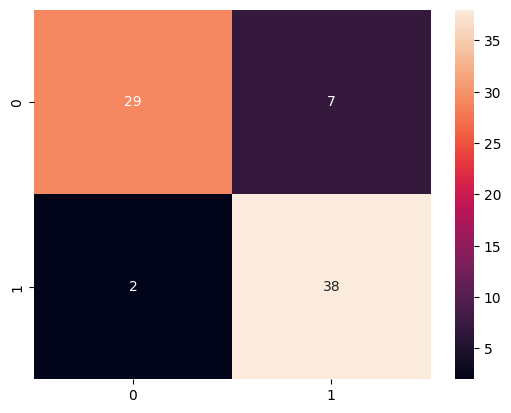

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
c_matrix = confusion_matrix(Y_test, Y_test_prediction1)
sns.heatmap(c_matrix, annot=True)


Second classifier(N):

<Axes: >

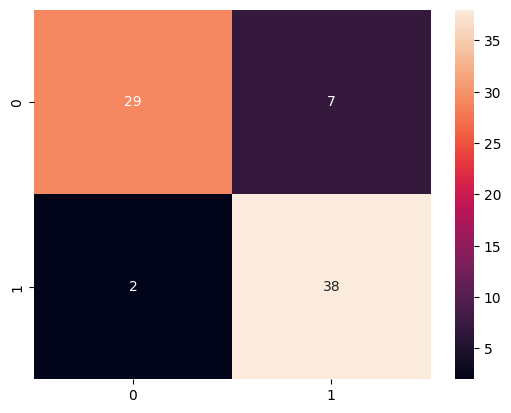

In [18]:
c_matrix = confusion_matrix(Y_test, Y_test_prediction2)
sns.heatmap(c_matrix, annot=True)

Saving the trained model:

In [19]:
import pickle
pickle_out = open("src/classifier.pkl","wb")
pickle.dump(classifier1, pickle_out)